In [1]:
%matplotlib inline
import gzip, json

france = json.load(gzip.open("data/france.continental-borders.json.gz"))

In [2]:
import numpy as np
from pyproj import Transformer

def projete(points, inverse=False):
    epsg = (4326, 2154)
    if inverse:
        epsg = epsg[::-1]
    transformer = Transformer.from_crs(*epsg)
    pts = np.asarray(points)
    return np.asarray(transformer.transform(pts[..., 0], pts[..., 1])).T

In [3]:
france_proj = projete(france)

france_proj.shape

(359352, 2)

In [4]:
def center_of_mass(points):
    points = np.asarray(points)
    if points.ndim == 1:
        px, py = points
    else:
        px, py = points[:, 0], points[:, 1]
    area = 0.5 * (np.dot(px[:-1], py[1:]) - np.dot(px[1:], py[:-1]))
    return np.dot(px[:-1] * py[1:] - px[1:] * py[:-1], points[1:, :] + points[:-1, :]) / (6 * area)

Coordoonnée WGS84 du centre de la France : [46.5782438   2.46861362]


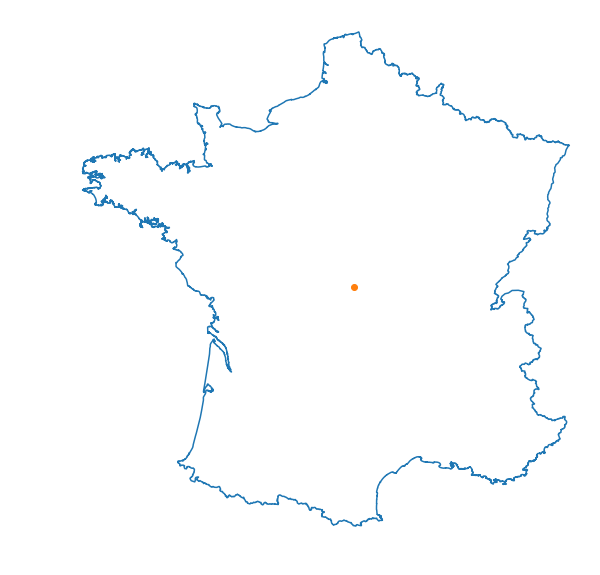

In [5]:
import matplotlib.pyplot as plt

center_proj = center_of_mass(france_proj)
center = projete(center_proj, inverse=True)
print("Coordoonnée WGS84 du centre de la France :", center)

fig = plt.figure(figsize=(10, 10))
ax = fig.gca(aspect='equal')

ax.plot(france_proj[:, 0], france_proj[:, 1])
ax.plot(*center_proj, 'o')

plt.axis("off")
plt.show()

In [6]:
import folium

m = folium.Map(location=center, zoom_start=15)

folium.Marker(center, popup='Centre de la France').add_to(m)

m

In [ ]:
m.options['zoom'] = 5

folium.PolyLine(france, color='red', weight=3, opacity=0.7).add_to(m)

m